In [1]:
# Examples of using pymatgen for VASP outputs

In [10]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import *
import os,glob

In [32]:
# The OUTCAR is the main output file
outcar = Outcar(filename='OUTCAR')

# There are several methods that can be used with the outcar object. 
# you can see them by pressing tab if in jupyter notebook or running ipython in linux terminal
outcar.run_stats

{'Average memory used (kb)': 0.0,
 'Maximum memory used (kb)': 52476.0,
 'Elapsed time (sec)': 36.414,
 'System time (sec)': 0.443,
 'User time (sec)': 34.943,
 'Total CPU time used (sec)': 35.386,
 'cores': '1'}

In [37]:
# Some others... 
print(outcar.efermi)
print(outcar.final_energy)
print(outcar.electrostatic_potential)

0.8588
-14.31337758
[-26.2787, -26.2787, -71.4275]


In [13]:
# The OSZICAR is an another import output file that has information about the electronic steps and energies
# The same info can be found in the OUTCAR, but is more condensed here. 
f = open('OSZICAR','r')
lines = f.readlines()
f.close()
lines
# To view in Linux terminal just use 'vi OSZICAR' or 'cat OSZICAR'

['       N       E                     dE             d eps       ncg     rms          rms(c)\n',
 'DAV:   1     0.113213082551E+02    0.11321E+02   -0.35779E+03   400   0.656E+02\n',
 'DAV:   2    -0.138473382493E+02   -0.25169E+02   -0.24565E+02   478   0.115E+02\n',
 'DAV:   3    -0.145614072459E+02   -0.71407E+00   -0.71334E+00   456   0.191E+01\n',
 'DAV:   4    -0.145625767772E+02   -0.11695E-02   -0.11695E-02   430   0.959E-01\n',
 'DAV:   5    -0.145625798969E+02   -0.31197E-05   -0.31197E-05   420   0.495E-02    0.113E+01\n',
 'RMM:   6    -0.141590160068E+02    0.40356E+00   -0.35879E+00   400   0.134E+01    0.447E+00\n',
 'RMM:   7    -0.143105155289E+02   -0.15150E+00   -0.10011E-01   400   0.252E+00    0.171E+00\n',
 'RMM:   8    -0.143024720973E+02    0.80434E-02   -0.29283E-02   400   0.169E+00    0.952E-01\n',
 'RMM:   9    -0.143115864818E+02   -0.91144E-02   -0.10956E-02   400   0.108E+00    0.166E-01\n',
 'RMM:  10    -0.143116626359E+02   -0.76154E-04   -0.69146E-04

In [15]:
# To import the OSZICAR file into a pymatgen object do the following: 
osz = Oszicar(filename='OSZICAR')
osz

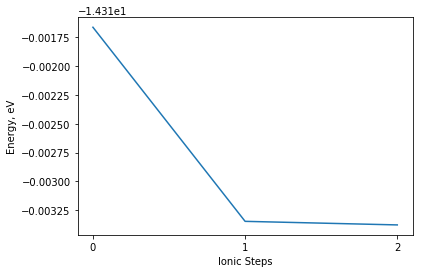

In [83]:
# The object has several methods, you can see them by pressing tab if in jupyter notebook or running ipython in linux terminal
# For example: 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ion_steps = osz.ionic_steps
x_iterations = list(range(0,len(ion_steps)))
y_energies = []
for i in range(len(ion_steps)):
    eng = ion_steps[i]['E0']
    y_energies.append(eng)
    
plt.plot(x_iterations,y_energies)
plt.xlabel('Ionic Steps')
plt.ylabel('Energy, eV')
plt.xticks(x_iterations)
plt.show()

In [20]:
#Another example: 
osz.ionic_steps

[{'F': -14.311663, 'E0': -14.311663, 'dE': -14.3117, 'mag': 0.0023},
 {'F': -14.313347, 'E0': -14.313347, 'dE': -0.00168464, 'mag': -0.0},
 {'F': -14.313378, 'E0': -14.313378, 'dE': -0.00171494, 'mag': 0.0}]

In [25]:
# The final energy can also be found from OSZICAR
# Note that this can be found in the last line of the OSZICAR file as well
E_final = osz.final_energy
print(E_final)


-14.313378 eV


In [ ]:
# coming up .... Band structue and stuff like that